<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Watchlist study**
In this study we explore the possibilities with my IMDb Watchlist. The dataset has attributes such as movie title, date added, year of release, genres, average rating, etc...

In [ ]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file = os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [4]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
147,2025-12-14,The Statement,Movie,6.2,120,2003,"Drama, Thriller",5791,2003-12-12,Norman Jewison,To watch with mom
148,2025-12-14,Secondhand Lions,Movie,7.5,109,2003,"Comedy, Drama, Family",65745,2003-09-19,Tim McCanlies,To watch with mom
149,2025-12-20,Mrs. Soffel,Movie,6.1,110,1984,"Drama, Romance",3849,1985-02-08,Gillian Armstrong,To watch with mom
150,2025-12-20,Ladies in Lavender,Movie,7.0,104,2004,"Drama, Music, Romance",13530,2005-05-27,Charles Dance,To watch with mom
151,2025-12-21,The Lonely Passion of Judith Hearne,Movie,7.0,116,1987,"Drama, Romance",1422,1989-02-02,Jack Clayton,To watch with mom


In [5]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(152, 11)

In [6]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      152 non-null    datetime64[ns]
 1   Title           152 non-null    object        
 2   Title Type      152 non-null    object        
 3   IMDb Rating     152 non-null    float64       
 4   Runtime (mins)  152 non-null    int64         
 5   Year            152 non-null    int64         
 6   Genres          152 non-null    object        
 7   Num Votes       152 non-null    int64         
 8   Release Date    152 non-null    datetime64[ns]
 9   Directors       149 non-null    object        
 10  Status          151 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 13.2+ KB


In [7]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Date added,IMDb Rating,Runtime (mins),Year,Num Votes,Release Date
count,152,152.000000,152.000000,152.000000,152.000000,152
mean,2023-10-25 14:50:31.578947328,6.502632,112.190789,1990.973684,45915.881579,1991-07-30 03:09:28.421052672
min,2020-05-15 00:00:00,4.600000,74.000000,1939.000000,101.000000,1939-12-15 00:00:00
25%,2022-05-08 00:00:00,6.000000,96.000000,1982.000000,2012.250000,1982-08-11 18:00:00
50%,2023-09-07 12:00:00,6.500000,104.500000,1993.000000,7557.000000,1993-08-05 00:00:00
75%,2025-09-26 00:00:00,6.900000,115.000000,2002.000000,35611.500000,2002-03-23 12:00:00
max,2025-12-21 00:00:00,8.800000,317.000000,2025.000000,846657.000000,2025-08-08 00:00:00
std,NaN,0.772195,34.780815,16.366234,98984.647206,NaN


# **Basic column data plotting**

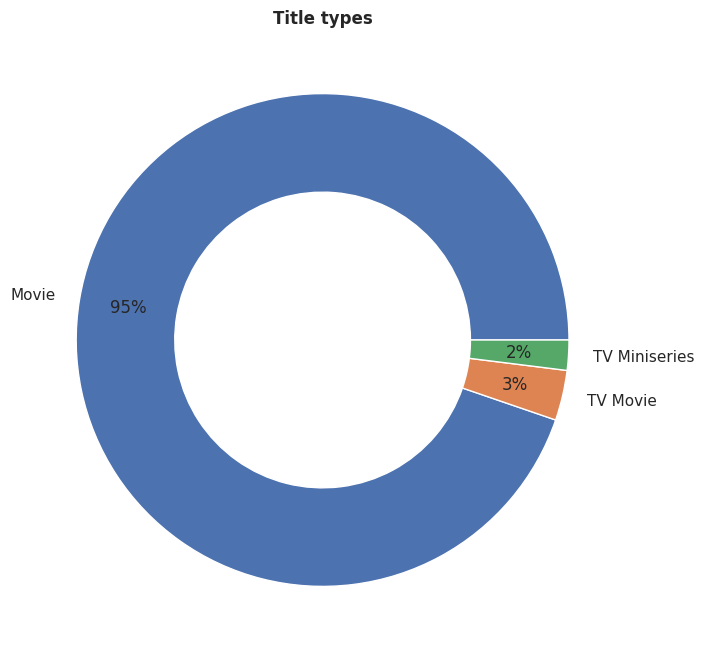

In [8]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

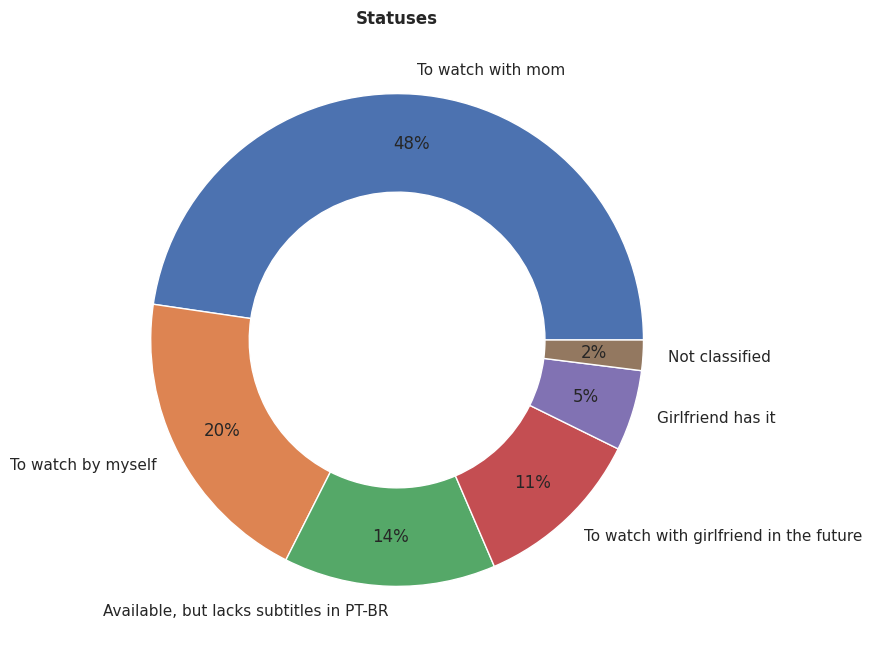

In [9]:
# Displaying the statuses present in the dataset:
wl['Status'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Statuses', fontweight = 'bold')
plt.show()

In [10]:
# Creating a datetime object based on the dates from the dataset:
wl['Date added'] = wl['Date added'].map(pd.to_datetime)
wl['Day added'] = wl['Date added'].apply(lambda x : x.day)
wl['Month added'] = wl['Date added'].apply(lambda x : x.month)
wl['Year added'] = wl['Date added'].apply(lambda x : x.year)
wl['Weekday added'] = wl['Date added'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      152 non-null    datetime64[ns]
 1   Title           152 non-null    object        
 2   Title Type      152 non-null    object        
 3   IMDb Rating     152 non-null    float64       
 4   Runtime (mins)  152 non-null    int64         
 5   Year            152 non-null    int64         
 6   Genres          152 non-null    object        
 7   Num Votes       152 non-null    int64         
 8   Release Date    152 non-null    datetime64[ns]
 9   Directors       149 non-null    object        
 10  Status          151 non-null    object        
 11  Day added       152 non-null    int64         
 12  Month added     152 non-null    int64         
 13  Year added      152 non-null    int64         
 14  Weekday added   152 non-null    int64         
dtypes: dat

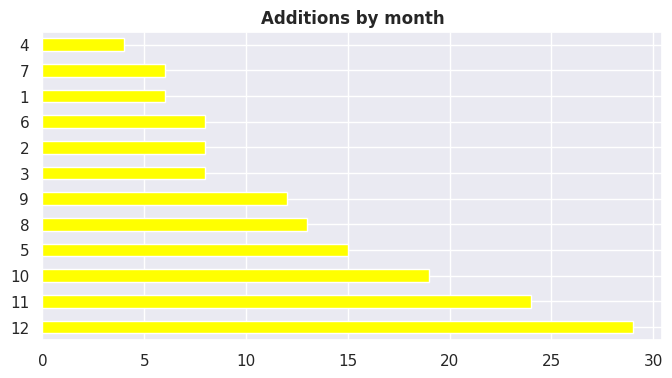

In [11]:
# Displaying the months with most and less additions:
wl['Month added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

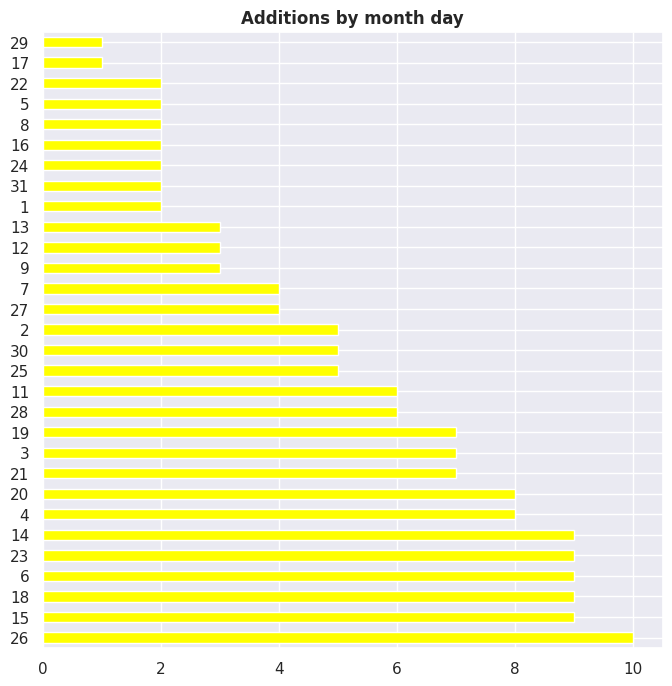

In [12]:
# Displaying the month days with most and less additions:
wl['Day added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

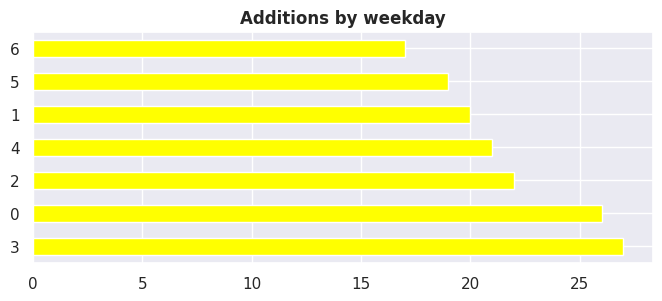

In [13]:
# Displaying the weekdays with most and less additions:
wl['Weekday added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

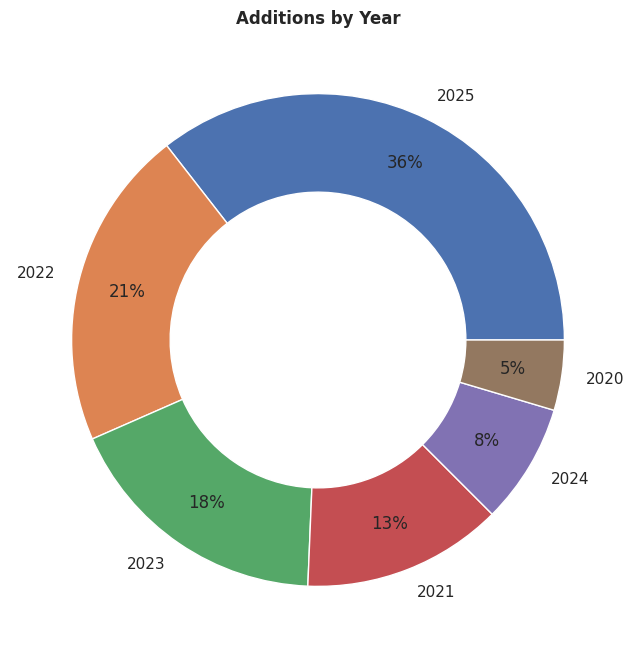

In [14]:
# Displaying the years with most and less additions:
wl['Year added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

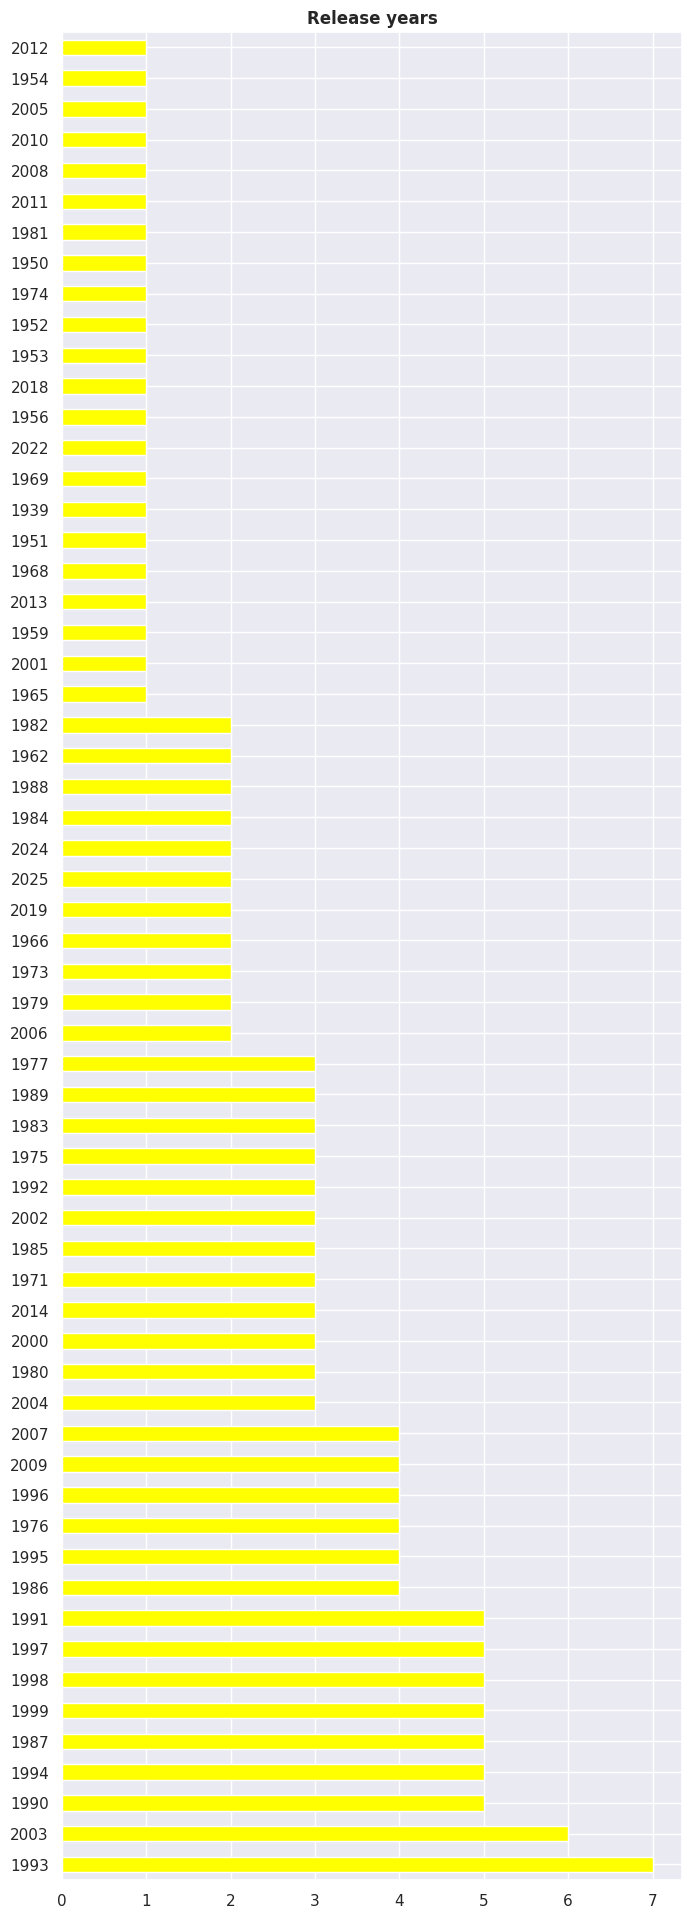

In [15]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

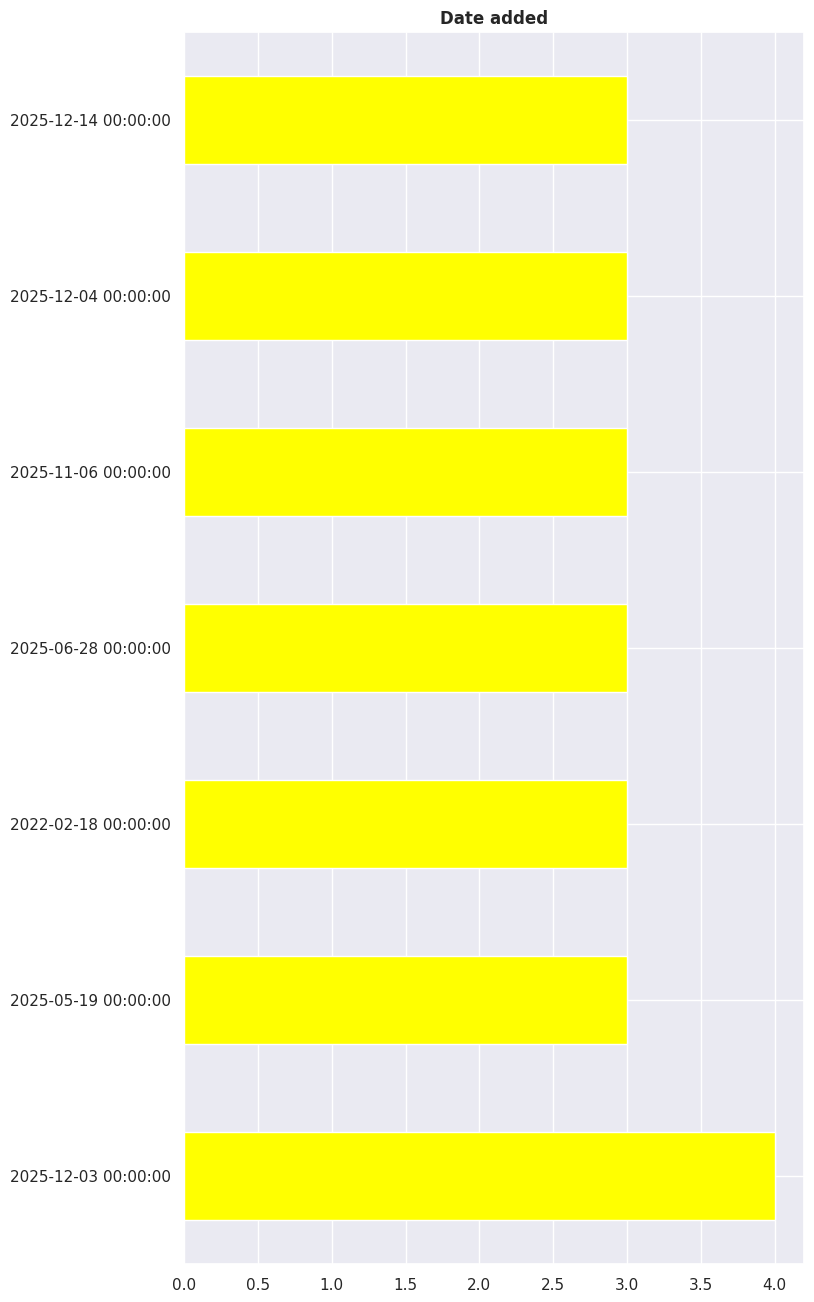

In [16]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = wl.groupby('Date added').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Date added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [18]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade
0,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s
1,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s
2,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s
3,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s
4,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06,Ron Maxwell,To watch with mom,26,11,2020,3,1990s


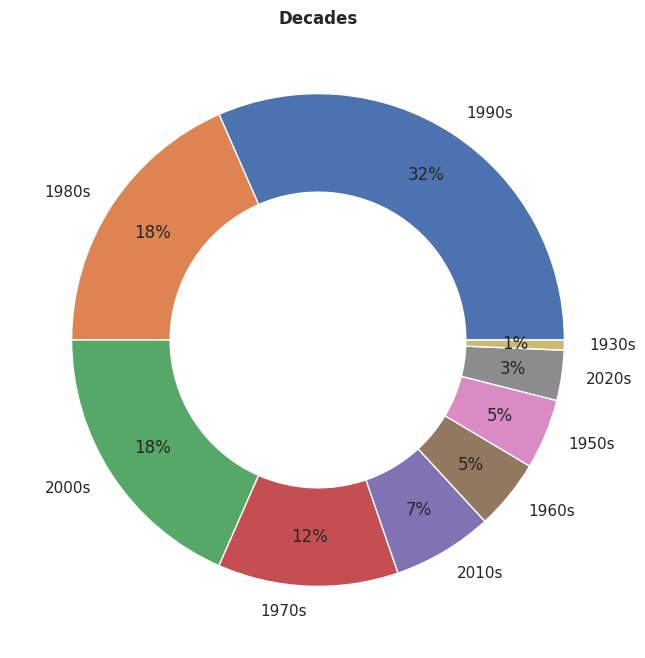

In [19]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality
0,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay
1,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay
2,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay
3,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay
4,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good


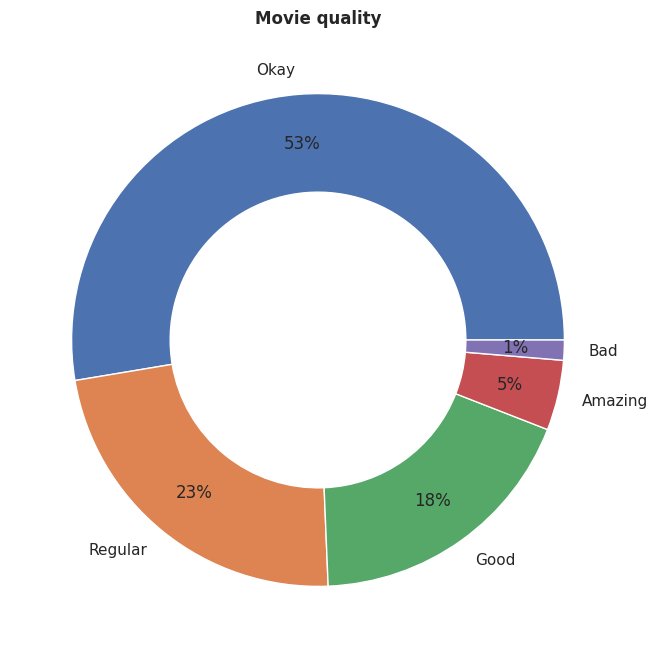

In [21]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity
0,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay,Less than 250k votes
1,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes
2,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay,Less than 250k votes
3,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay,Over 250k votes
4,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes


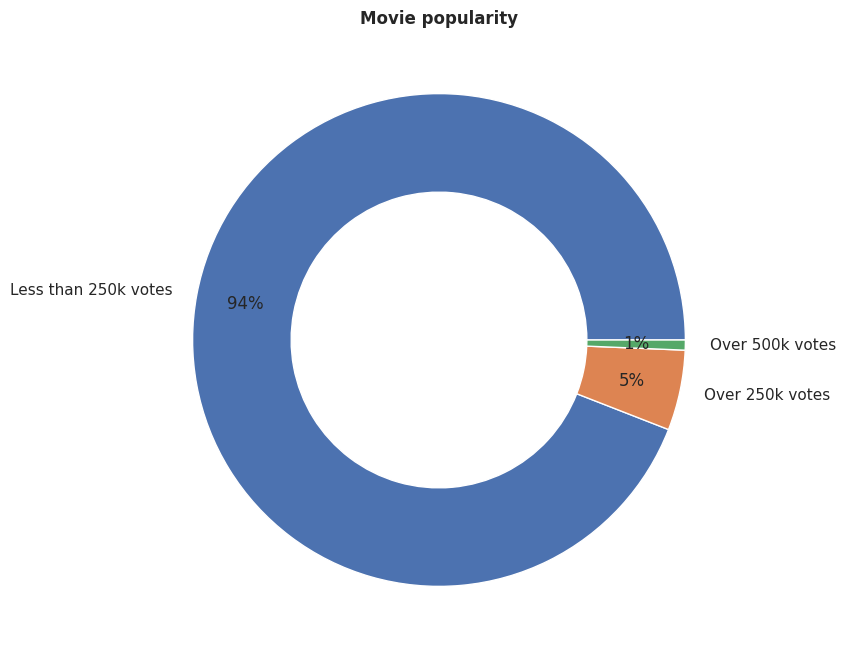

In [23]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration
0,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29
1,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29
2,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay,Less than 250k votes,Between 1h30 and 1h39
3,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay,Over 250k votes,Between 1h40 and 1h59
4,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h


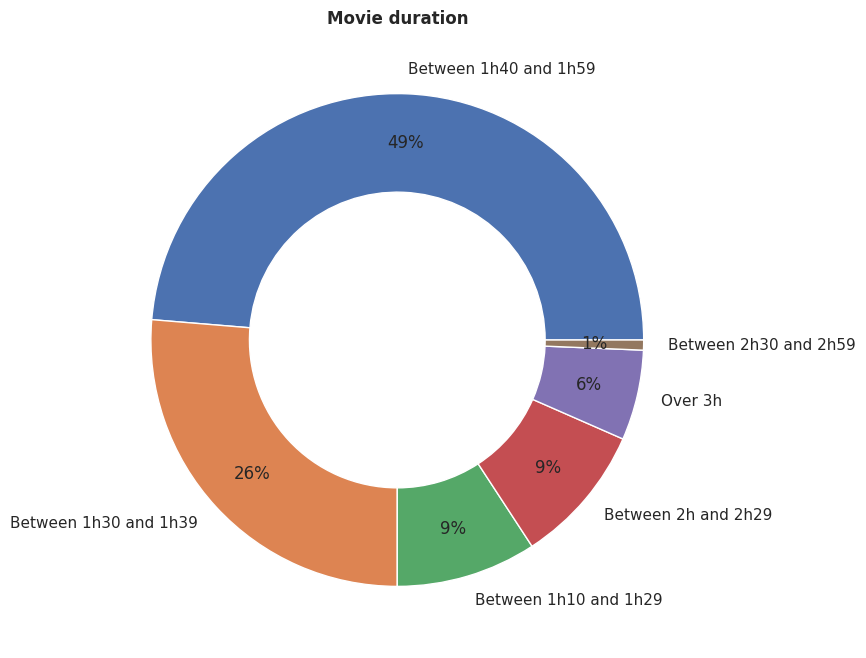

In [25]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month added'].apply(year_quartile)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",To watch with girlfriend in the future,15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second
1,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second
2,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,To watch with girlfriend in the future,18,10,2020,6,1980s,Okay,Less than 250k votes,Between 1h30 and 1h39,Fourth
3,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",To watch with girlfriend in the future,26,10,2020,0,2000s,Okay,Over 250k votes,Between 1h40 and 1h59,Fourth
4,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h,Fourth


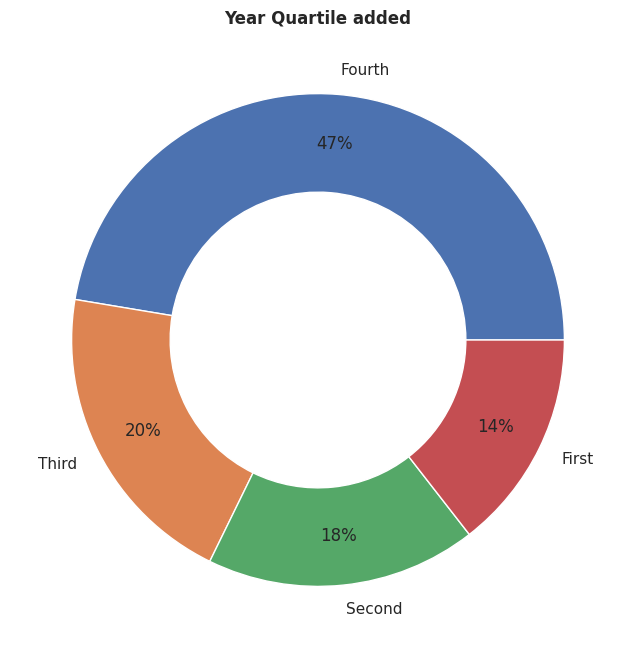

In [27]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [28]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day added'].apply(month_half)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16,"Mike Gabriel, Hendel Butoy",...,15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second,First
1,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19,"Art Stevens, Wolfgang Reitherman, John Lounsbery",...,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second,First
2,2020-10-18,"Honey, I Shrunk the Kids",Movie,6.4,93,1989,"Adventure, Comedy, Family, Sci-Fi",166375,1989-06-23,Joe Johnston,...,18,10,2020,6,1980s,Okay,Less than 250k votes,Between 1h30 and 1h39,Fourth,Second
3,2020-10-26,"Me, Myself & Irene",Movie,6.6,116,2000,Comedy,251306,2000-06-15,"Peter Farrelly, Bobby Farrelly",...,26,10,2020,0,2000s,Okay,Over 250k votes,Between 1h40 and 1h59,Fourth,Second
4,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06,Ron Maxwell,...,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h,Fourth,Second


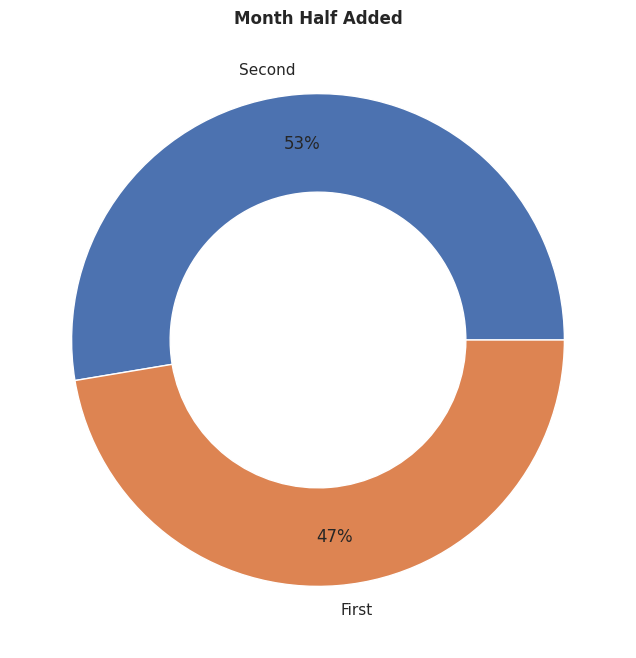

In [29]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

**The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [30]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [31]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         131    21
Adventure      133    19
Animation      150     2
Biography      139    13
Comedy         106    46
Crime          119    33
Documentary    148     4
Drama           48   104
Family         136    16
Fantasy        142    10
Film-Noir      150     2
History        141    11
Horror         142    10
Music          147     5
Mystery        138    14
Romance        119    33
Sci-Fi         144     8
Sport          146     6
Thriller       116    36
War            146     6
Western        150     2


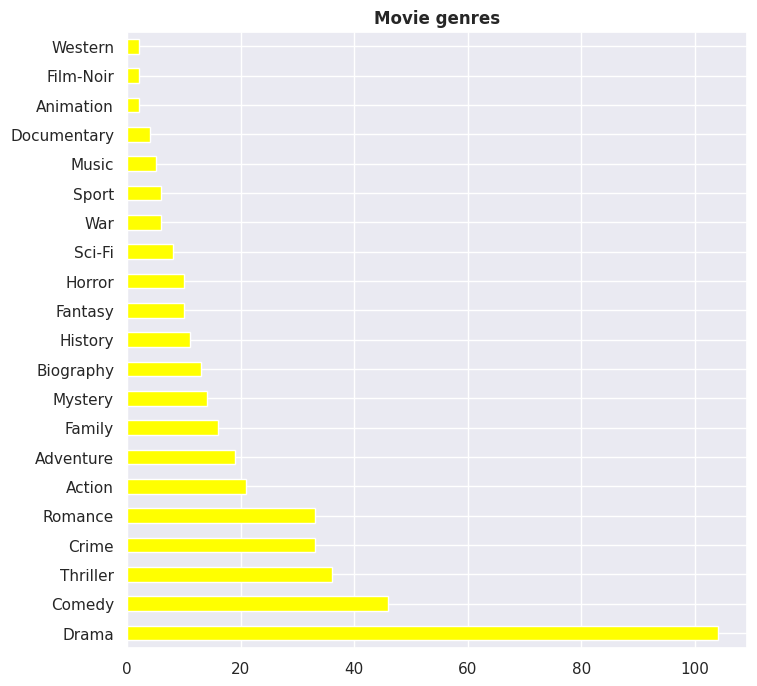

In [32]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [33]:
wl['Directors'].value_counts()

director_counts = (
    wl['Directors']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Director', 'Directors': 'Count'})
)

print(director_counts.head(10))

                 Count  count
0       Barry Levinson      8
1        Daniel Petrie      7
2       Sidney Poitier      7
3         Oliver Stone      6
4          Art Stevens      5
5  Wolfgang Reitherman      5
6         Mike Gabriel      5
7         Hendel Butoy      5
8       John Lounsbery      5
9         F. Gary Gray      5


<Axes: title={'center': 'Directors with at Least 2 Appearances'}, xlabel='Director', ylabel='Number of Movies'>

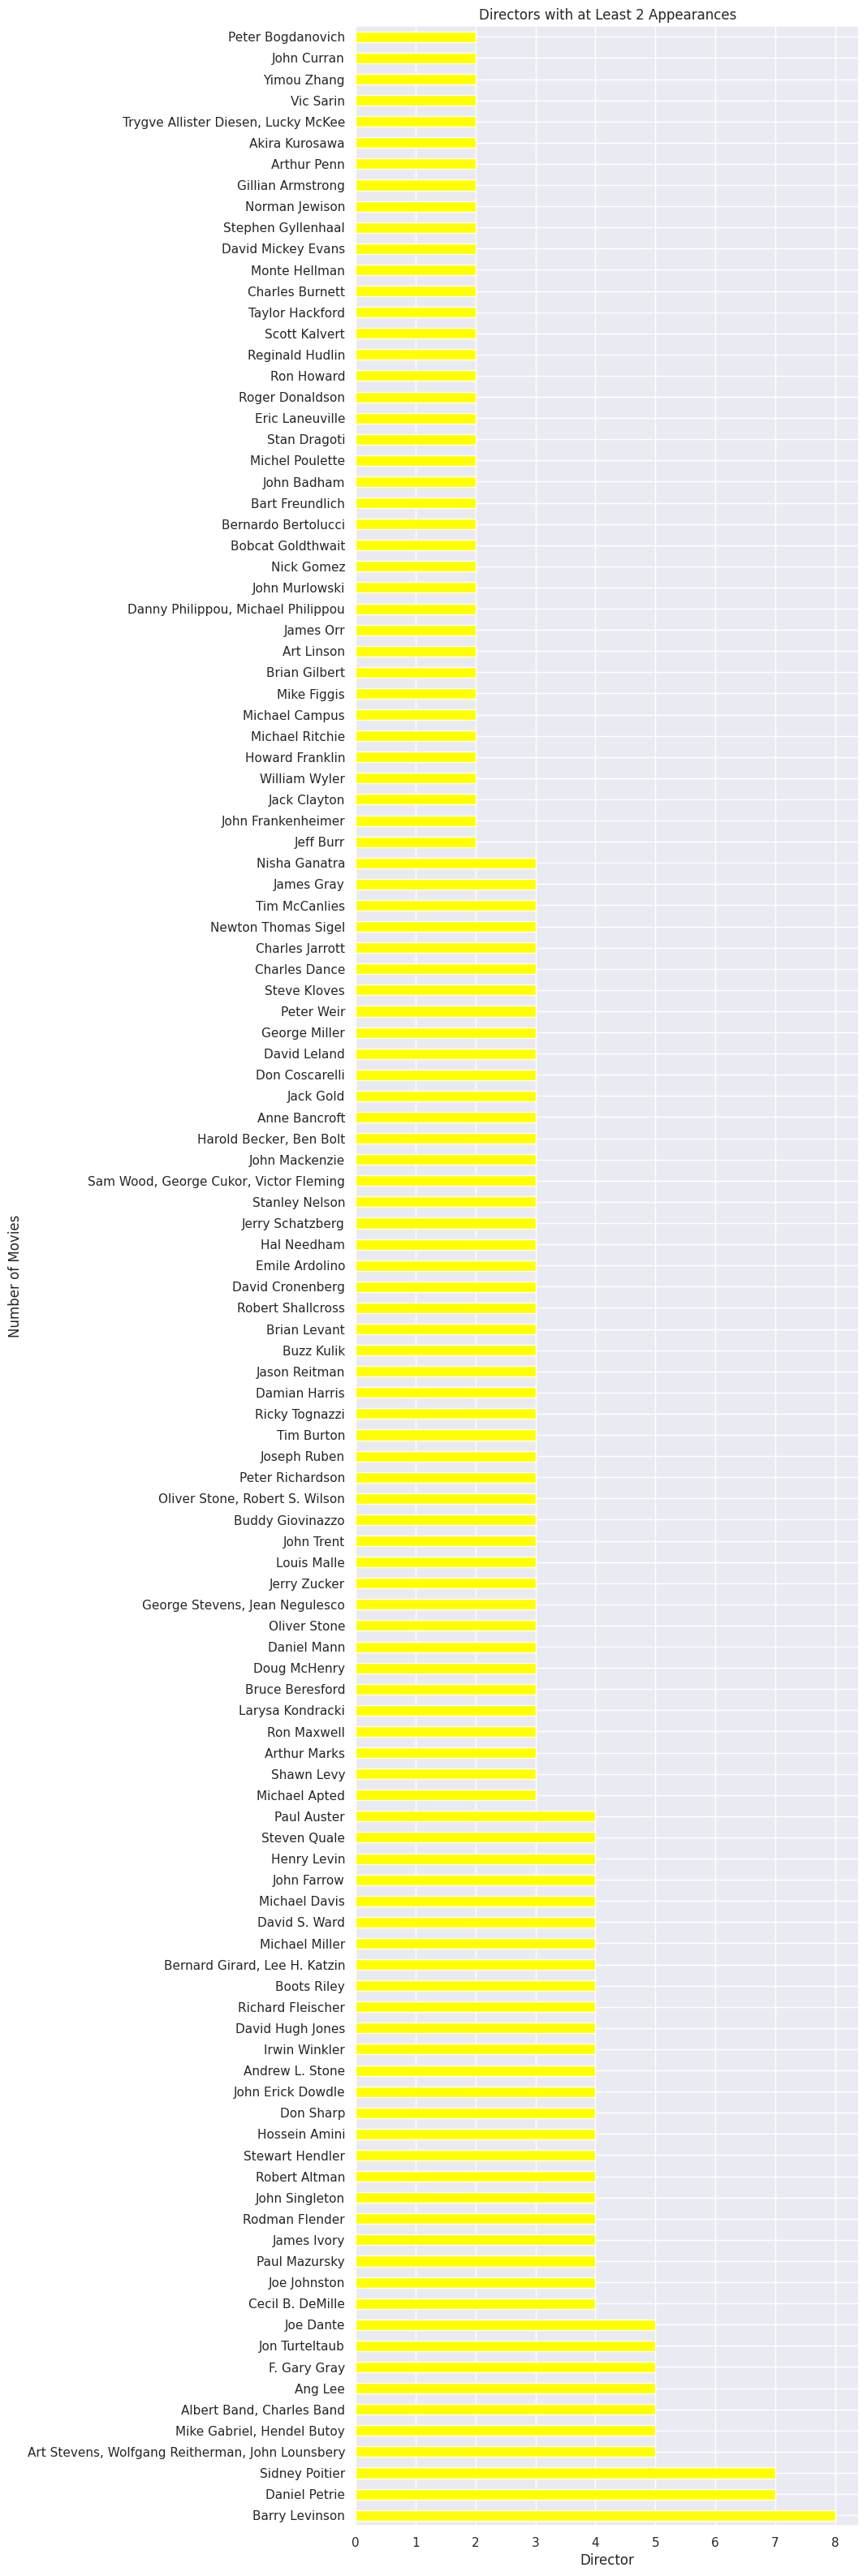

In [34]:
director_counts = wl['Directors'].value_counts()

directors_2plus = director_counts[director_counts >= 2]

directors_2plus.plot(kind = 'barh', color = 'yellow', figsize = (8, 40),
                     title='Directors with at Least 2 Appearances',
                     xlabel='Director',
                     ylabel='Number of Movies'
)